## Task
Predict house prices 
## Dataset
Boston housing dataset
## Project Steps
1. Load the data and examine
2. Data cleaning and formatting
    1. Data types and missing values
    2. Convert data to correct types
    3. Missing values
5. Exploratory data analysis (EDA)
    1. Single variable plots (distribution of single variable)
    2. Removing outliers
    3. Looking for relationships
    4. Correlations between features and target
    5. Two variable plots (relationship between two variables)
    6. Pairs plot (examine many variables at once)
12. Feature engineering and selection
    1. Remove collinear features
14. Split into training and testing sets
15. Establish a baseline
16. Decide metric (mean absolute error)
17. Evaluating and comparing machine learning models
    1. Imputing missing values
    2. Scaling features
    3. Models to evaluate
21. Model optimization
    1. Hyperparameters
    2. Hyperparameters tuning (random search and cross validation)
24. Evaluate final model on the test set
26. Interprete the model
27. Feature importances
28. Use feature importances for feature selection
29. Locally interpretable model-agnostic explanations (LIME)
30. Examining a single decision tree
31. Make conclusions and document findings
32. Presenting the work





In [240]:
# print all outputs
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"  # last_expr

import pandas as pd
from sklearn.datasets import load_boston

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Make plotly work offline
import plotly.offline as py
py.init_notebook_mode(connected=False)
import cufflinks as cf
cf.set_config_file(offline=True)

In [4]:
boston_dataset = load_boston()

In [5]:
dir(boston_dataset)
boston_dataset.feature_names
boston_dataset.data.shape
boston_dataset.target.shape
# print (boston_dataset.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

(506, 13)

(506,)

#### Attribute Information:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full value property tax rate per 10,000 dollars
        - PTRATIO  pupil teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [198]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X.head()
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
y.head()
train = pd.concat([X,y], axis=1)
train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [7]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

#### Take your time to understand the attributes
* Numerical/percentage - CRIM, ZN, INDUS, AGE, LSTAT
* Dummy - CHAS
* Numerical/ratio - NOX, PTRATIO
* Numerical - RM, DIS, TAX, B
* Numerical / discrete or categorical - RAD verify?

In [8]:
X.info()
# data types are good
# some columns can be integer but float will work too.
# No need to convert data to correct types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
# missing values
has_missing_values = False
for col in X:
    if X[col].isna().ravel().sum() > 0:
        has_missing_values = True
        print (col, ':', X[col].isna().ravel().sum())
for col in y:
    if y[col].isna().ravel().sum() > 0:
        has_missing_values = True
        print (col, ':', y[col].isna().ravel().sum())
if not has_missing_values:
    print ('Check: No Missing Values found!')

Check: No Missing Values found!


## Exploratory data analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c3a7a1208>,
      dtype=object)

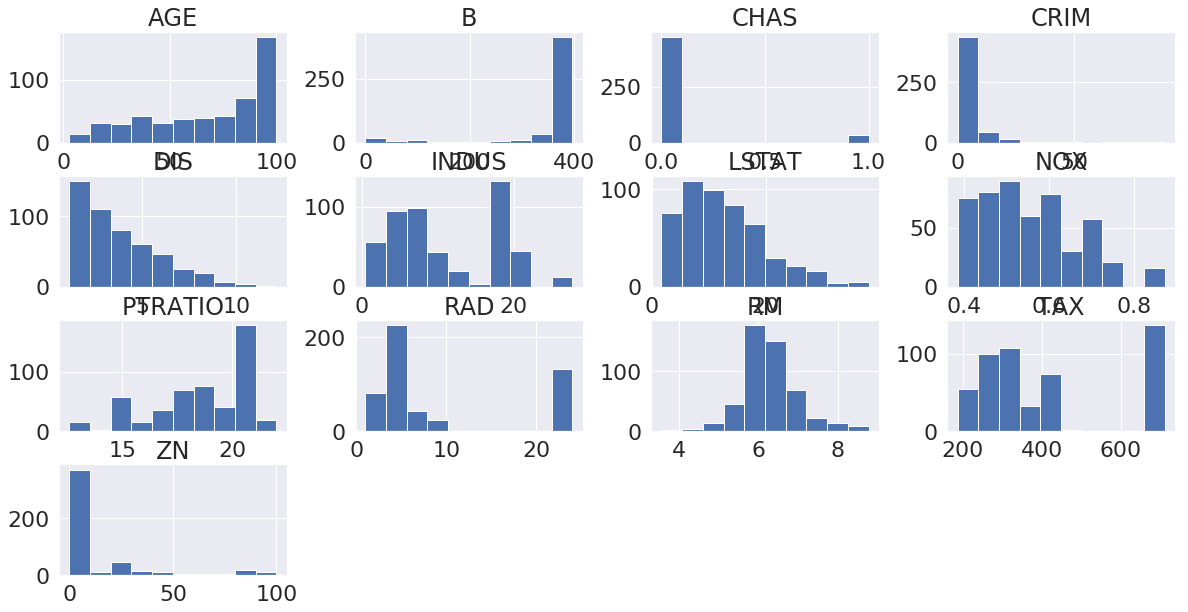

In [10]:
# single variable plots (Lets try histogram)
X.hist(figsize=(20,10))
# Couldn't infer much from the histogram charts. Hmmm..
# Let's try the boxplot for outliers

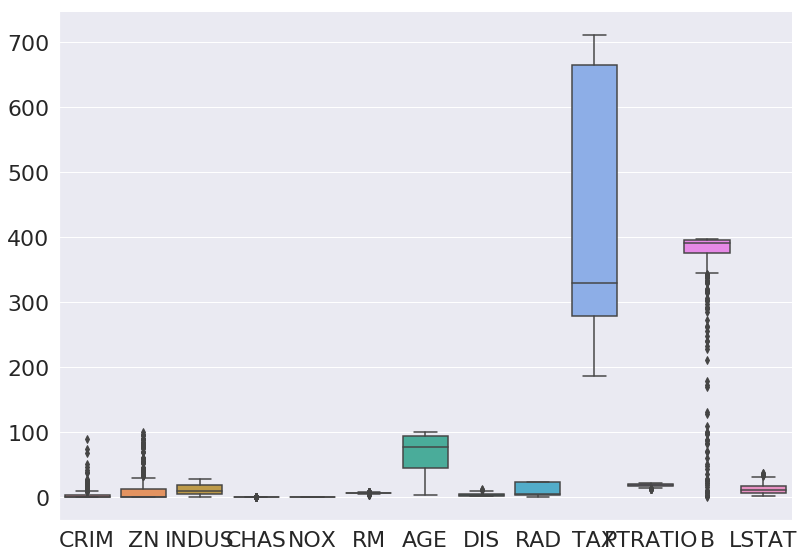

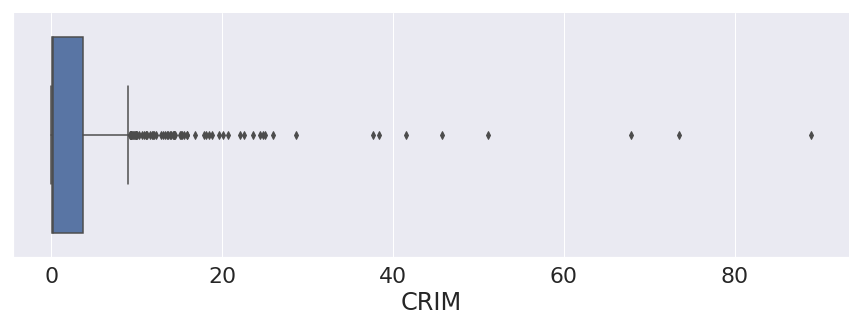

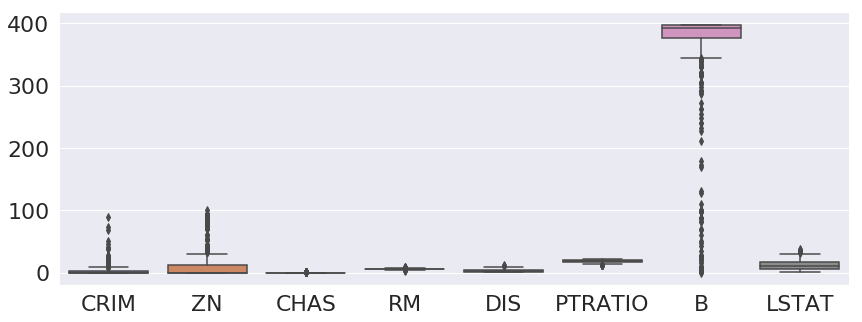

In [27]:
# using seaborn
sns.catplot(data=X, kind='box', height=8.27, aspect=11.7/8.27)
# boxplot without tax for examining others closely
sns.catplot(data=X[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']], kind='box', aspect=20/8)

In [208]:
# DONT REMOVE FOR CHAS (dummy variable)
# using IQR formula to remove outliers
cols = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
Q1 = X.quantile(.25)
Q3 = X.quantile(.75)
IQR = Q3-Q1
X_no_o = X[X >= (Q1 - 1.5 * IQR)][X <= (Q1 + 1.5 * IQR)]
# af = X_no_o
# af = af.loc[:, af.columns.isin(cols)]
# af = af.melt()
# af['outliers'] = 'removed'
# bf = X.loc[:, X.columns.isin(cols)]
# bf = bf.melt()
# bf['outliers'] = 'not removed'
# both = pd.concat([bf, af])
# sns.catplot(data=both, row='variable', col='outliers', kind='box', sharey=False, aspect=10/8)

# for c in ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']:
#     c, X_no_o[c].isna().ravel().sum()
# len(X[X.CRIM <= Q1.CRIM + 1.5 * IQR.CRIM])
import numpy as np

# all(X >= (Q1 - 1.5 * IQR), X <= (Q1 + 1.5 * IQR))
# x = X.copy()
# Q1 = x.quantile(.25)
# Q3 = x.quantile(.75)
# IQR = Q3-Q1
# x = x[(x >= (Q1 - 1.5 * IQR)).all(axis=1)]
# x = x[(x <= (Q1 + 1.5 * IQR)).all(axis=1)]
# len(x)
# len(y[.all(axis=1)])

x = X.copy()
Q1 = x.quantile(.25)
Q3 = x.quantile(.75)
IQR = Q3-Q1
records = []
# instead of removing 1.5*IQR lets remove 3*IQR for extreme outliers only
for c in ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']:
    no_l = x[(x[c] >= (Q1[c] - 3 * IQR[c]))]
    no_r = x[(x[c] <= (Q1[c] + 3 * IQR[c]))]
    records.append([c, len(x), len(x)-len(no_l), (len(x)-len(no_l))/len(x)*100, len(x)-len(no_r), (len(x)-len(no_r))/len(x)*100])

pd.DataFrame(records, columns=['Column', 'total # rows', '# outliers left', 
           '% outliers left', '# outliers right', '% outliers right'])

Column  total # rows  # outliers left  % outliers left  # outliers right  \
0     CRIM           506                0         0.000000                50   
1       ZN           506                0         0.000000                58   
2       RM           506                1         0.197628                10   
3      DIS           506                0         0.000000                 1   
4  PTRATIO           506                0         0.000000                 0   
5        B           506               58        11.462451                 0   
6    LSTAT           506                0         0.000000                 2   

   % outliers right  
0          9.881423  
1         11.462451  
2          1.976285  
3          0.197628  
4          0.000000  
5          0.000000  
6          0.395257

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c1e0dcc50>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c214e5358>,
      dtype=object)

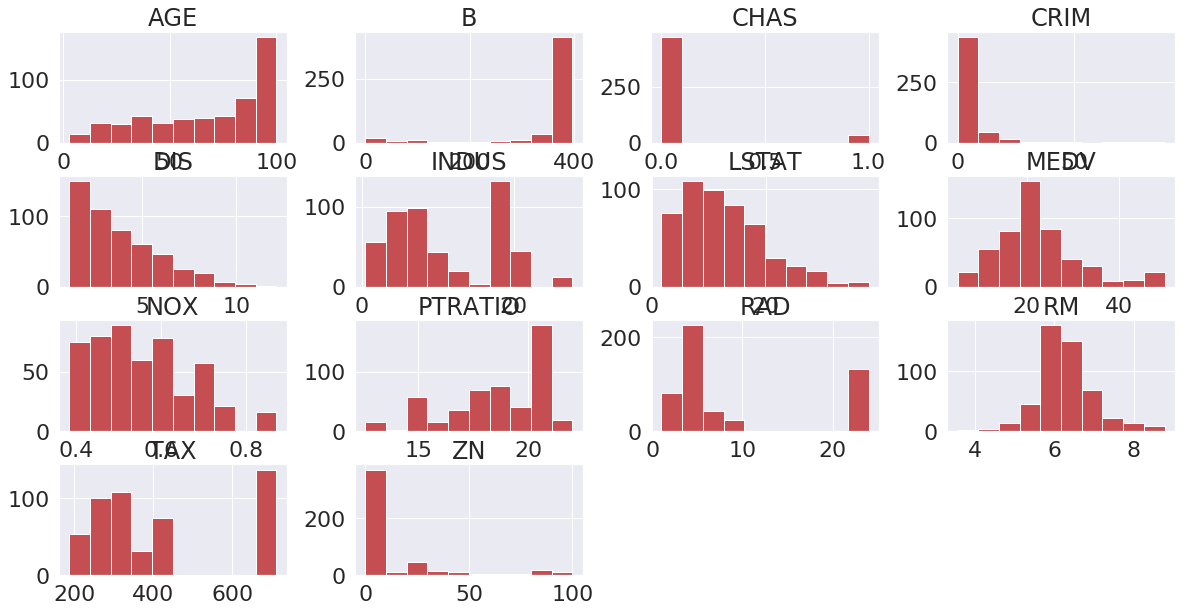

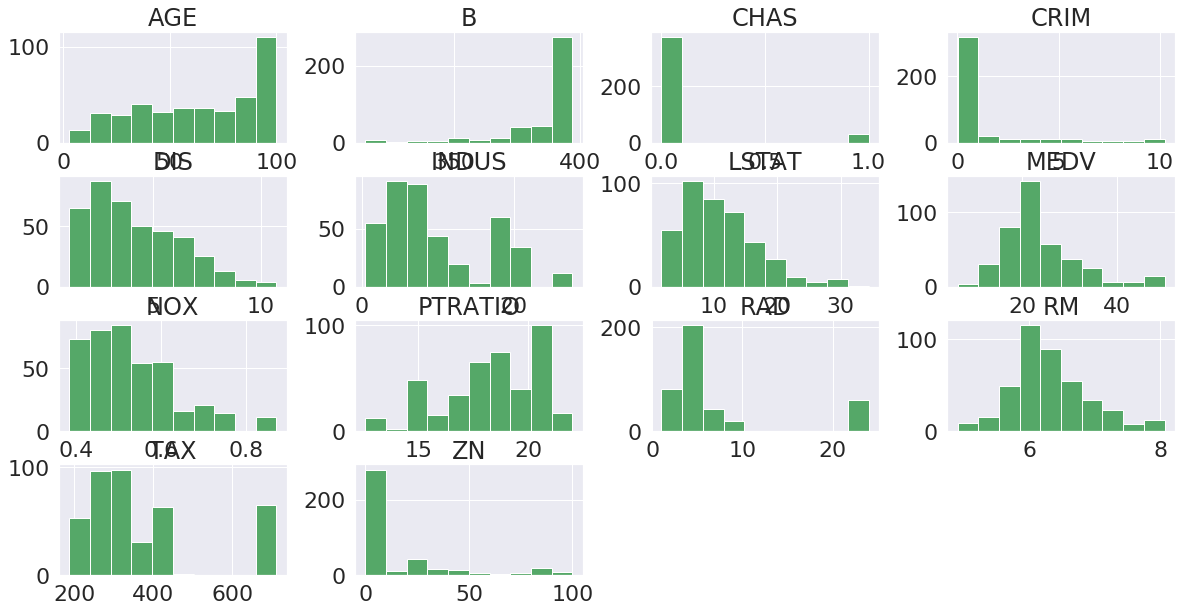

In [226]:
# we will remove outliers below 10% 
# everything except ZN 
x = train
for c in ['CRIM', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']:
    x = x[(x[c] >= (Q1[c] - 3 * IQR[c]))]
    x = x[(x[c] <= (Q1[c] + 3 * IQR[c]))]
train.hist(figsize=(20,10), color='r')
x.hist(figsize=(20,10), color='g')
t = train

### We have removed outliers from 2 columns. RM and PTRATIO

In [236]:
t.columns
med_vals = t.dropna(subset=['MEDV'])
rad = t['RAD'].value_counts()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

24.0

5.0

4.0

3.0

6.0

8.0

2.0

1.0

7.0

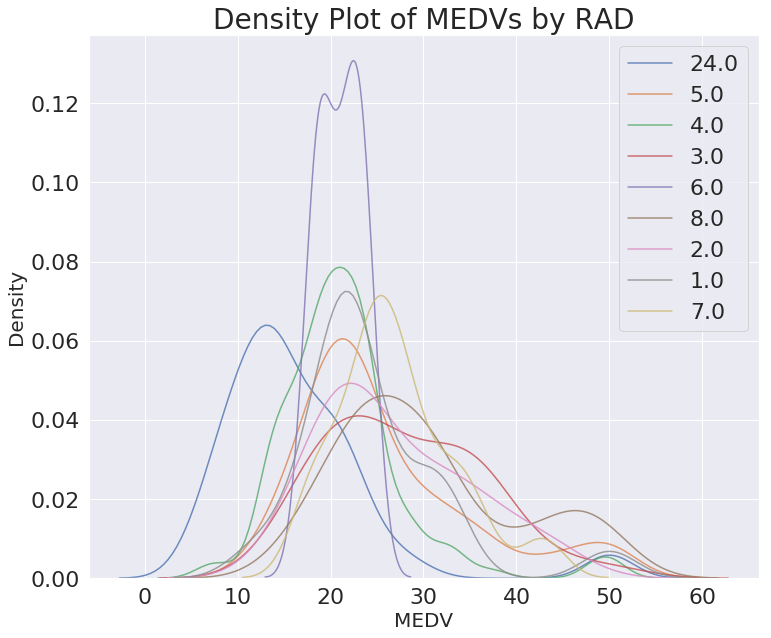

In [242]:
# Plot of distribution of MEDV for RAD
figsize(12, 10)

# Plot each building
for rad_v in rad.index:
    # Select the building type
    subset = t[t['RAD'] == rad_v]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['MEDV'].dropna(),
               label = rad_v, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MEDV', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of MEDVs by RAD', size = 28);

- From this graph we can see that RAD does have an effect on the MEDV values of the house. 
- This is categorical and have to be one-hot encoded. (assuming 1 & 2 index are not closer)
- Numerical if the values are in the order

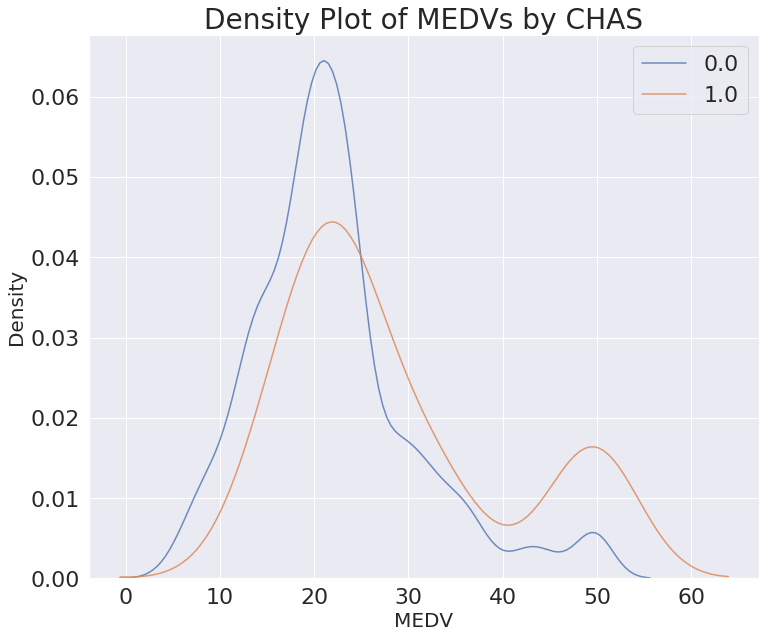

In [243]:
# Plot of distribution of MEDV for CHAS
figsize(12, 10)

chas = t['CHAS'].value_counts()

# Plot each building
for v in chas.index:
    subset = t[t['CHAS'] == v]
    
    sns.kdeplot(subset['MEDV'].dropna(),
               label = v, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MEDV', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of MEDVs by CHAS', size = 28);

Looks like CHAS doesn't have much impact on the MEDV values. we can remove CHAS, for now we will keep it.

### Correlations between Features and Target


In [247]:
# Find all correlations and sort 
correlations_data = t.corr()['MEDV'].sort_values()

# # Print the most negative correlations
# print(correlations_data.head(15), '\n')

# # Print the most positive correlations
print(correlations_data.tail(15))

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64


LSTAT have strong negative correlation and RM have strong positive correlation with the target.

To account for possible non-linear relationships, lets take sqrt and natural log transformations and calculate correlations again.

In [252]:
t1 = t.copy()
for col in ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']:
    t1['sqrt_'+col] = np.sqrt(t1[col])
    t1['log_'+col] = np.log(t1[col])
t1.head()
t1.corr()['MEDV'].sort_values()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  ...  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  ...   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0  ...   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0  ...   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0  ...   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0  ...   

   sqrt_RAD   log_RAD   sqrt_TAX   log_TAX  sqrt_PTRATIO  log_PTRATIO  \
0  1.000000  0.000000  17.204651  5.690359      3.911521     2.727853   
1  1.414214  0.693147  15.556349  5.488938      4.219005     2.879198   
2  1.414214  0.693147  15.556349  5.488938      4.219005     2.879198   
3  1.732051  1.098612  14.899664  5.402677      4.324350     2.928524   
4  1.732051  1.098612  14.899664  5.402677      4.324350     2.928524   

      sqrt_B     log_B  sqrt_LSTAT  log_LSTAT  
0  19.922349  5.983684    2.231591   1.605430  
1  19.922349  5.983684    3.023243   2.212660  
2  19.819939  5.973377    2.007486   1.393766  
3  19.865296  5.977949    1.714643   1.078410  
4  19.922349  5.983684    2.308679   1.673351  

[5 rows x 38 columns]

log_LSTAT      -0.815442
sqrt_LSTAT     -0.785109
LSTAT          -0.737663
log_INDUS      -0.519270
sqrt_INDUS     -0.507810
PTRATIO        -0.507787
sqrt_PTRATIO   -0.505699
log_PTRATIO    -0.503160
INDUS          -0.483725
log_TAX        -0.474701
sqrt_TAX       -0.472746
TAX            -0.468536
sqrt_CRIM      -0.463354
log_CRIM       -0.454302
log_NOX        -0.430806
sqrt_NOX       -0.429903
NOX            -0.427321
CRIM           -0.388305
RAD            -0.381626
AGE            -0.376955
sqrt_RAD       -0.369820
sqrt_AGE       -0.359216
log_RAD        -0.342632
log_AGE        -0.326512
CHAS            0.175260
log_ZN          0.194699
DIS             0.249929
sqrt_DIS        0.273946
log_B           0.283157
log_DIS         0.292316
sqrt_B          0.322276
B               0.333461
ZN              0.360445
sqrt_ZN         0.382970
log_RM          0.660173
sqrt_RM         0.679413
RM              0.695360
MEDV            1.000000
Name: MEDV, dtype: float64

log_LSTAT have strong positive relationship, lets work with LSTAT for now and come back to it later.

### Two Variable Plots

In [261]:
import pandas_profiling
t.profile_report()

* TAX is highly correlated with RAD (ρ = 0.91023) so, we can remove TAX
* ZN has 372 (73.5%) zeros so, we can remove ZN

In [265]:
t = t.loc[:, ~t.columns.isin(['TAX', 'ZN'])]
t.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

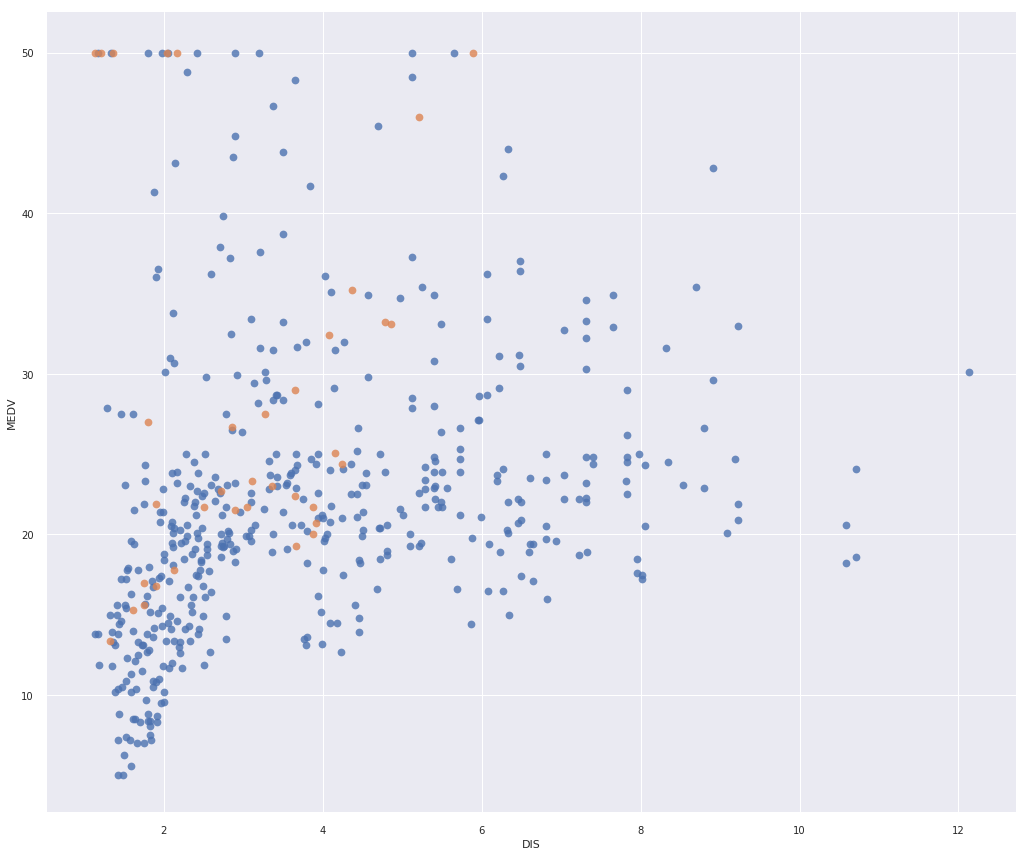

In [286]:
# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('DIS', 'MEDV', data = t, hue='CHAS',
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2, legend=False);

# # Plot labeling
# plt.xlabel("Site EUI", size = 28)
# plt.ylabel('Energy Star Score', size = 28)
# plt.title('Energy Star Score vs Site EUI', size = 36);

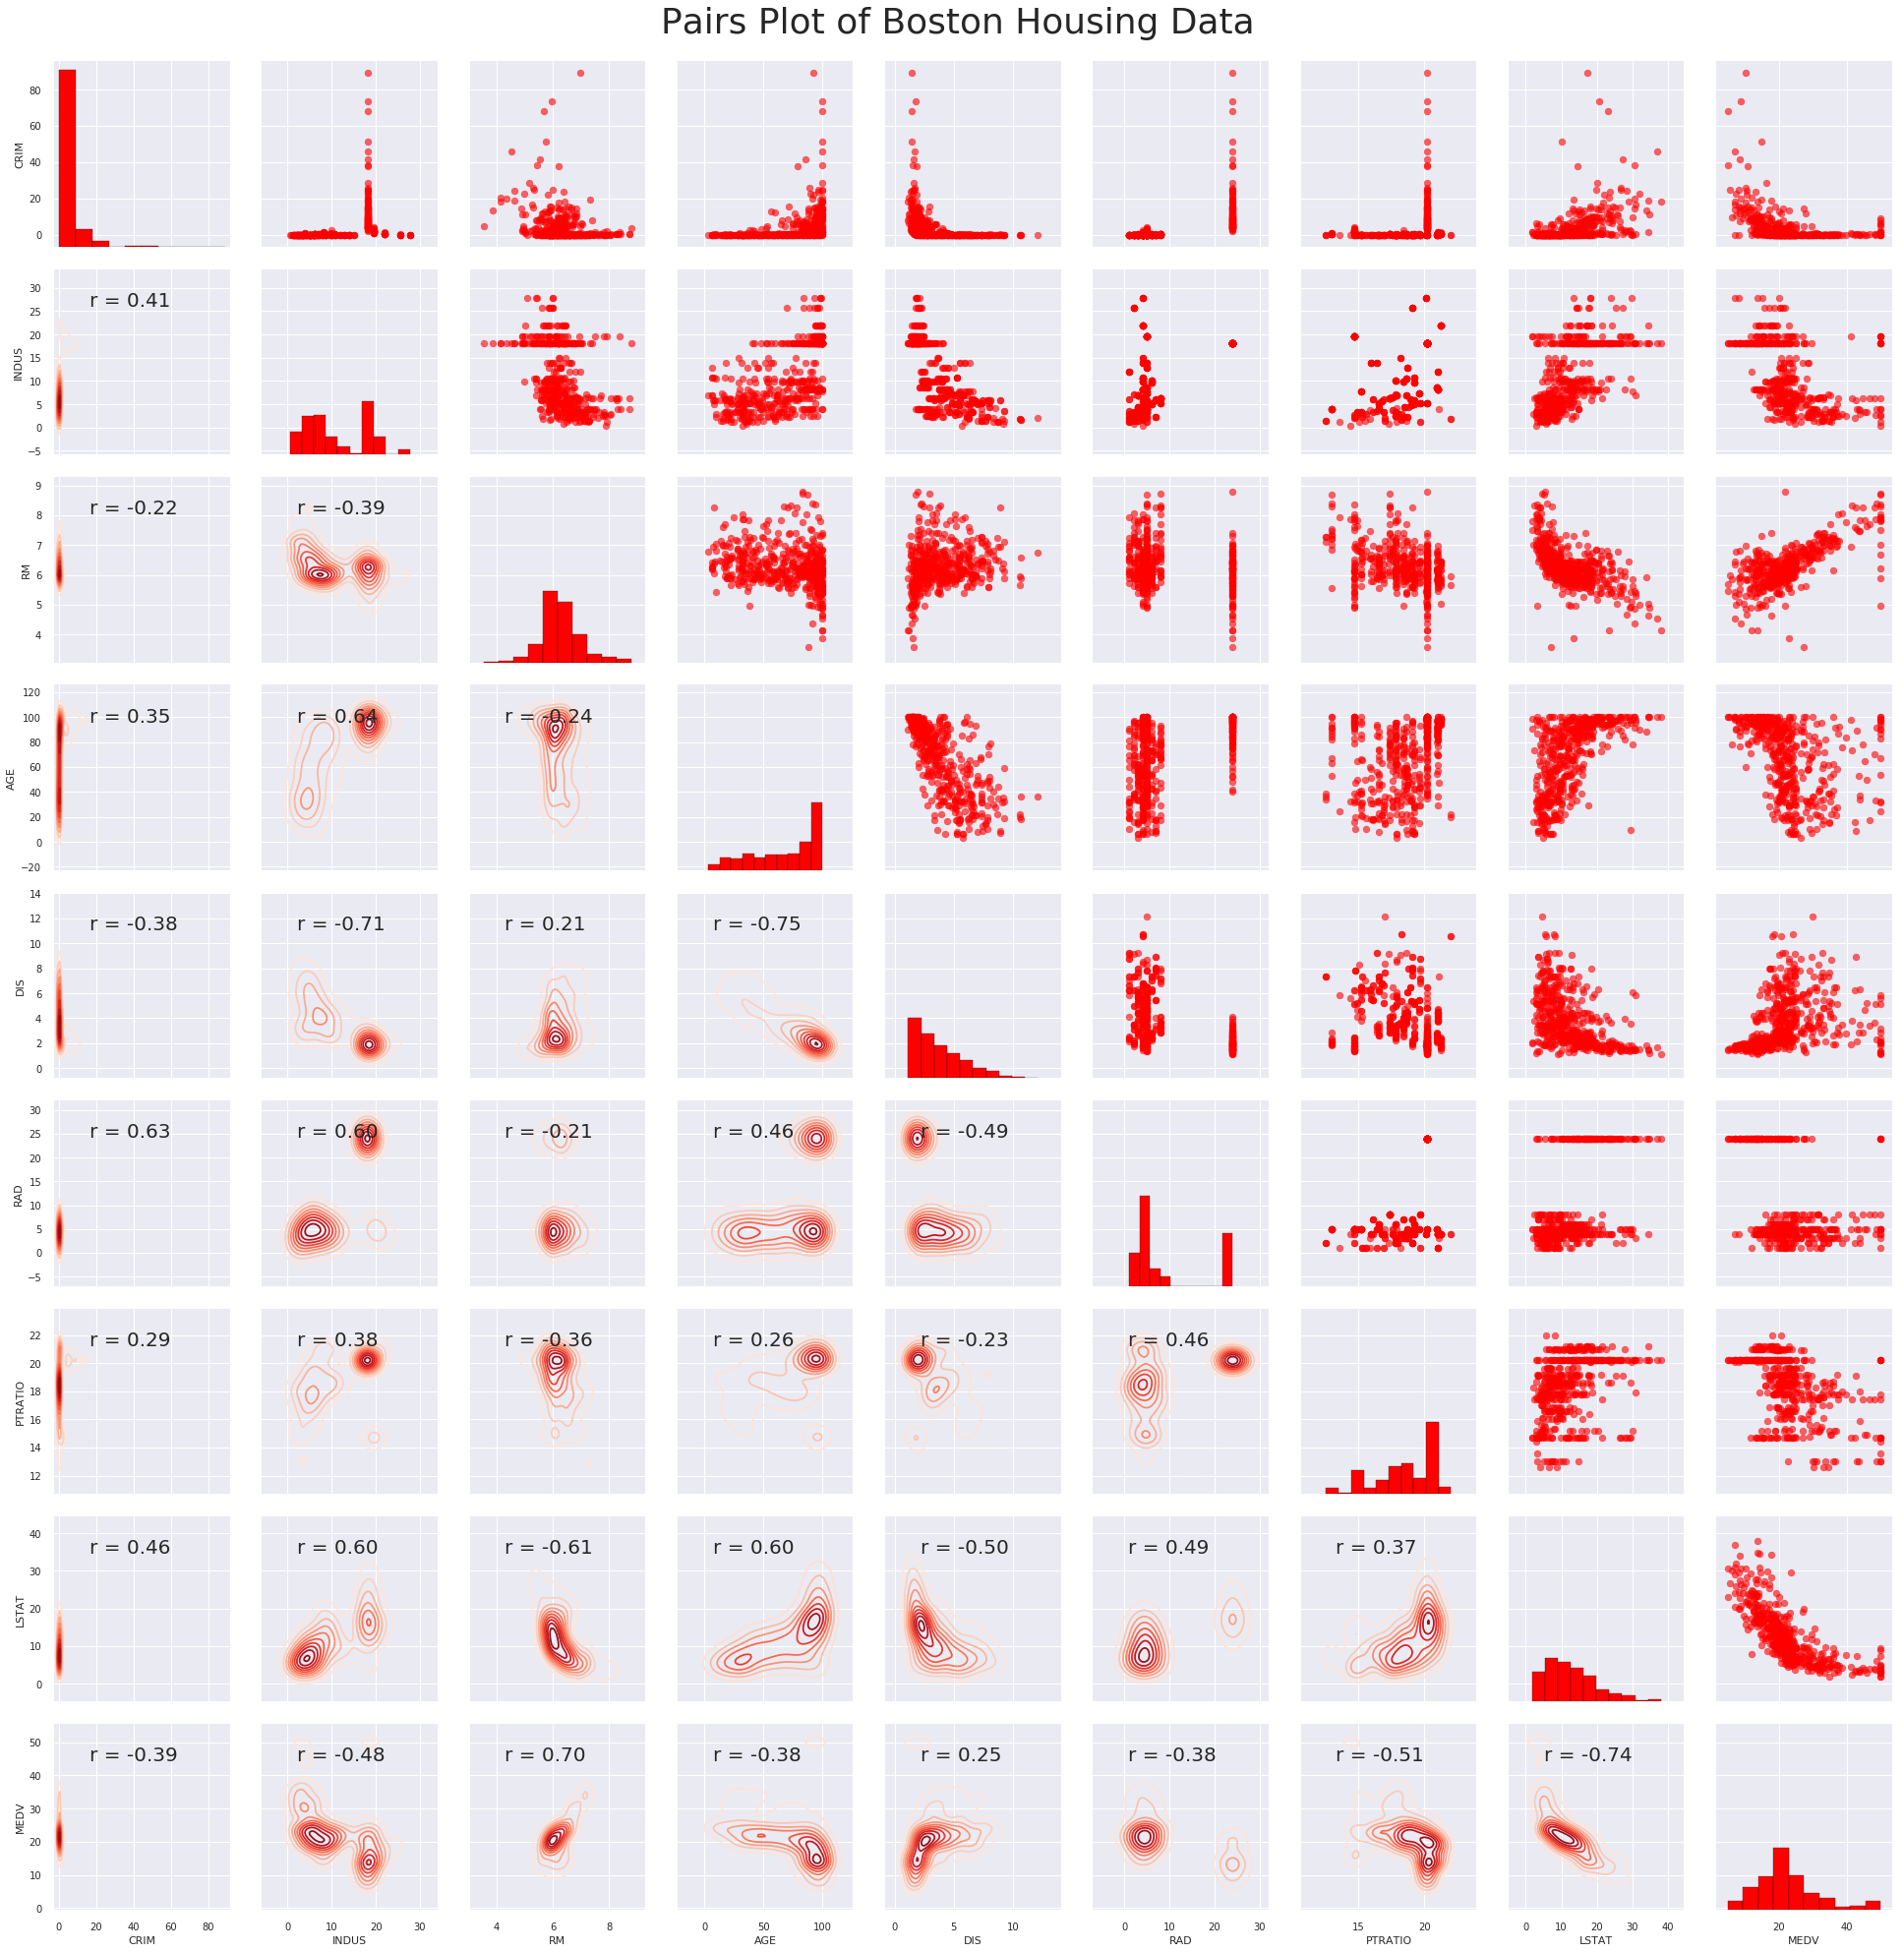

In [279]:
# Extract the columns to  plot
# ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO',
#        'B', 'LSTAT', 'MEDV']
plot_data = t[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MEDV']]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Boston Housing Data', size = 36, y = 1.02);

From above plot we can clearly see the relationships between few variables
* CRIM, RM, AGE, DIST, LSTAT with MEDV
* RM, AGE, DIST with LSTAT
* INDUS with PTRATIO
* RM with DIST
* AGE with DIST

Don't know how to read contour map? Need to come back.